# Toronto Housing Market
## Why are houses so expensive in Toronto? 

There has been a lot of public debate recently about housing prices in Toronto. The cost of living is becoming unaffordable for many Torontonians and home ownership has become unfeasible for a growing percentage of the population. 

There have been lots of explanations offered and solutions presented from across the political spectrum, yet the data underlying many of these arguments seems surprisingly scarce and the arguments surprisingly non-quantitative. 

## The aim of this analysis is to 
1. Understand the most important cause of high prices
2. Suggest one or two policy proposals, based on the findings above, that are most likely to reduce housing prices by the largest magnitude. 


## City of Toronto
The map below shows the geographical boundaries of the City of Toronto highlighted in yellow. The Greater Toronto Area also includes the Halton, Peel, York and Durham regions. But, for the purposes of this analysis, we will only work with the data for the City of Toronto, and not GTA. 

<img src='images/cityoftorontomap.png' width='800' height='1000'>


In [1]:
# Load dependencies

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
import time

import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

## Trends of Average Sale Price of houses in Toronto

First, we examine the status quo. How have the prices behaved over the last two decades  [<sup>1</sup>](#fn1)


<span id="fn1">1. Source: Toronto Regional Real Estate Board Historic Archive </span>

In [2]:
avg_sale_df = pd.read_csv('C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/toronto-avgsales-avgsalesprice.csv')
avg_sale_df

,Year,Sales,Average Sale Price
0,2000,58343,243255
1,2001,67612,251508
2,2002,74759,275231
3,2003,78898,293061
4,2004,83501,315231
5,2005,84145,335907
6,2006,83084,351941
7,2007,93193,376236
8,2008,74505,379080
9,2009,86980,395234


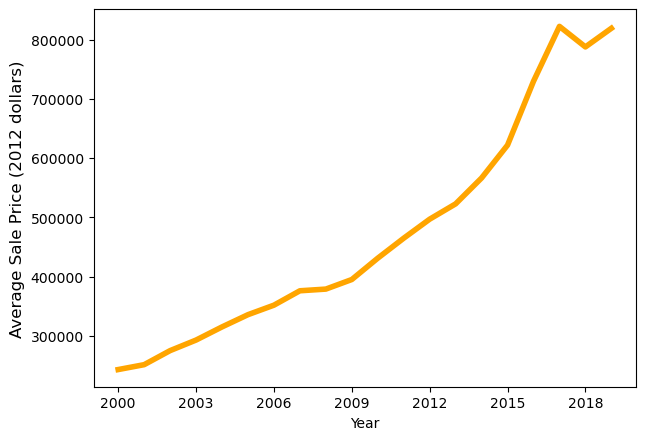

In [3]:
avg_sale_df.plot(x='Year', y='Average Sale Price', color='orange', linewidth=4, legend=False)
plt.ylabel('Average Sale Price (2012 dollars)', fontsize=12)
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)



## The average sale price in Toronto has increased by 237% in the last two decades, with a much dramatic rise in the last 10 years. 

# 1. Income and Demographics

## lets check population growth over the years

Toronto is one of the fastest growing metropolitan cities in North America. The bar chart below shows census data for the City of Toronto for the last two decades [<sup>2</sup>](#fn2)



<span id="fn2">2. Sources:
a. "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2006 and 2001 censuses - 100% data". Statistics Canada, 2006 Census of Population.
b. "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2011 and 2006 censuses". Statistics Canada, 2011 Census of Population.
c. "Toronto population count". Statistics Canada, 2016 Census of Population. </span>

In [4]:
pop_df = pd.read_csv("C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/toronto-population.csv")
pop_df

,Year,Toronto city population
0,2001,2481494
1,2006,2503281
2,2011,2615060
3,2016,2731571


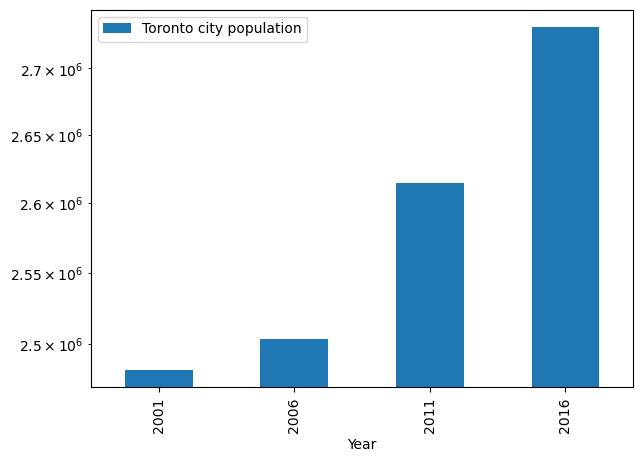

In [5]:
pop_df.plot(x='Year', y='Toronto city population', kind='bar', logy=True)

In [6]:
pop_df['Toronto city population'].pct_change()*100

0         NaN
1    0.877979
2    4.465300
3    4.455385
Name: Toronto city population, dtype: float64

Population grew by 4.46% from 2011 to 2016, from 2,615,060 people to 2,731,571 in 2016, indicating an average annual growth close to 23000 people, which is comparable to the national growth rate of 5.9% [<sup>3</sup>](#fn3)



<span id="fn3">3. Source:  Statistics Canada: https://www12.statcan.gc.ca/census-recensement/2011/as-sa/fogs-spg/Facts-cma-eng.cfm?LANG=Eng&GK=CMA&GC=535) </span>





~~By 2041, Population is projected to grow by double this amount, according to the 2019 study by Canadian Centre for Economic Analysis. ~~

Within the GTA, Toronto’s population is projected to rise from 2.97 million in 2019 to 3.73 million in 2046, an increase of 25.9 per cent, slower than the provincial growth rate.


As population increases, demand and competition for housing is expected to increase

##  Lets take a look at how the median income of households has changed, and compare that to the ownership costs of a typical home in Toronto. 

In [7]:
med_income_df = pd.read_csv('C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/toronto-median-income.csv')
med_income_df['median income (all households)'] = med_income_df['median income (all households)'].str.replace(',', '').astype(int)
med_income_df

,year,median income (all households)
0,2001,57900
1,2002,58200
2,2003,58500
3,2004,60100
4,2005,61800
5,2006,63800
6,2007,66560
7,2008,68120
8,2009,66790
9,2010,68110


In [8]:
benchmark_household_df = pd.read_csv('C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/MLS-BenchmarkPrices-AllHouseholdTypes-composite.csv')
benchmark_household_df

,Year,Composite Benchmark Price
0,2005,313984
1,2006,329542
2,2007,348442
3,2008,361567
4,2009,362500
5,2010,399434
6,2011,424734
7,2012,453500
8,2013,471834
9,2014,507409


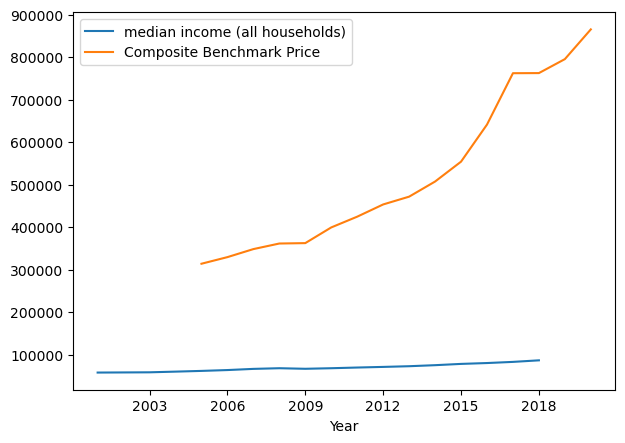

In [9]:
# fig,ax = plt.subplots()

# ax.plot(med_income_df['year'], med_income_df['median income (all households)'], color='red')
# # ax.set_ylim(0, 100000)
# ax.set_xlabel('year',fontsize=14)
# ax.set_ylabel('median income (all households)', fontsize=14)

# ax2=ax.twinx()
# ax2.plot(benchmark_household_df['Year'], benchmark_household_df['Composite Benchmark Price'])
# # ax2.set_ylim(0,900000)
# ax2.set_ylabel('composite benchmark price')
              

ax = med_income_df.plot(x='year', y='median income (all households)')
benchmark_household_df.plot(ax=ax, x='Year', y='Composite Benchmark Price')
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)

## Taking into consideration the growth between years 2005 to 2018 (for which we have both income and ownership cost data), median household income grew only 40% while average home ownership costs grew 143% reducing movement of middle-income households from rental housing to ownership.


# 2. A look at the lending rates for mortgages and credit accessibility

lowered mortgage lending rates and relaxed insurance rules allow for more people to enter the market. Thus driving up the demand, which if not increased in proportion to the supply, home prices will increase! 

A more accessible credit is kind of like an incentive for people to stop renting, and actually buying and calling a home theirs, by taking advantage of more flexible and affordable borrowing terms. 


In [10]:
lend_rate_df = pd.read_csv('C:/Users/MMS-012/Documents/GitHub/TorontoHousingMarket/datasets/canada-lendingrates.csv')
lend_rate_df

,Year,Lending Rate
0,2000,8.20
1,2001,7.18
2,2002,6.70
3,2003,6.04
4,2004,5.80
5,2005,5.48
6,2006,5.98
7,2007,6.36
8,2008,6.41
9,2009,5.06


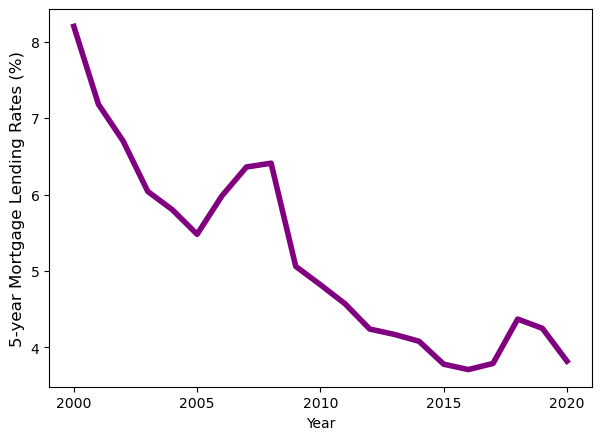

In [11]:
lend_rate_df.plot(x='Year', y='Lending Rate', legend=False, color='purple', linewidth=4)
plt.ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
plt.locator_params(axis='x', nbins=5)

The above graph shows the steep decline of mortgage lending rates in the last two decades, with a couple of local maxima around the time of recession in 2008 and a smaller one around 2018, before it falls further in 2020 during Covid-19 pandemic. 


A lower mortgage rate means an increase in buying power because a person can now borrow a larger sum of money, while keeping the monthly payments same! 

The chart below the shows the inverse relationship between lending rates and house prices. 

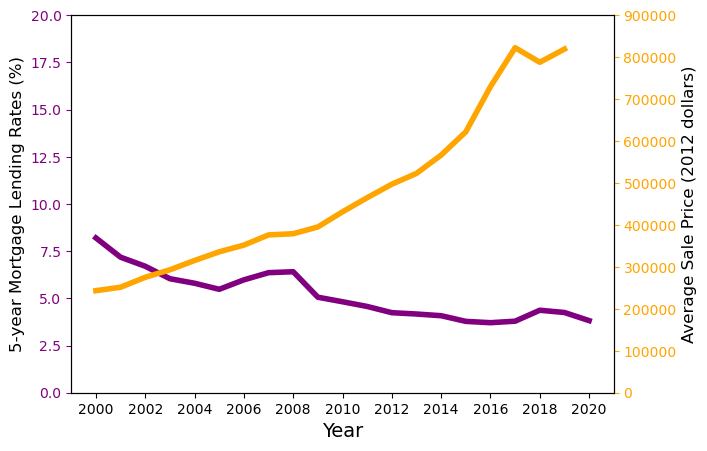

In [12]:
fig,ax = plt.subplots()

ax.plot(lend_rate_df['Year'],lend_rate_df['Lending Rate'], color='purple', linewidth=4)
ax.set_ylim(0, 20)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
ax.tick_params(axis='y', colors='purple')

ax2=ax.twinx()
ax2.plot(avg_sale_df['Year'], avg_sale_df['Average Sale Price'], color='orange', linewidth=4)
ax2.set_ylim(0, 900000)
ax2.set_ylabel('Average Sale Price (2012 dollars)', fontsize=12)
plt.locator_params(axis='x', nbins=12)
ax2.tick_params(axis='y', colors='orange')

There is a strong inverse relationship between lending rates and sale price for the City of Toronto, but it is not a factor that can be used to understand the rise in home prices. Since, for an average person, the actual cost of owning a home has not changed significantly. Even though houses are expensive today, than 20 years ago, monthly costs are similar today to those in 2000. 

# 3. Construction and Development costs

These include the costs incurred due to construction material and the labour wages, which are expected to change as economies change. As these costs increase, they can drive up the home prices. 

Let us look at the data, and see their significance. 

The graph below shows the New Housing Price Index [<sup>4</sup>](#fn4)



<span id="fn4">4. Statistics Canada. Table 18-10-0205-01 New housing price index, monthly</span>

### [ The increase in these charges accounts for only a small fraction of the increase in home prices. ]




Construction Union Wage Rate Index [<sup>5</sup>](#fn5)

<span id="fn5">5. Statistics Canada. Table 18-10-0051-01 Construction union wage rates index, monthly</span>